FashionMNIST


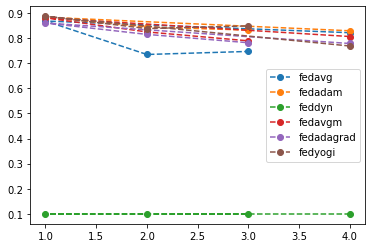

In [4]:
import os
import matplotlib.pyplot as plt

path = './results'

# Get a list of datasets
datasets = os.listdir(path)
print(datasets[1])
# Get a list of algorithms for the first dataset
algorithms = os.listdir(os.path.join(path, datasets[1]))

# Get a list of niids for the first algorithm
niids = [int(i) for i in os.listdir(os.path.join(path, datasets[1], algorithms[0]))]

# Get the latest results for each algorithm and niid
results = []
for algorithm in algorithms:
    algorithm_results = []
    for niid in niids:
        niid_path = os.path.join(path, datasets[1], algorithm, str(niid))
        latest_result = sorted(os.listdir(niid_path), reverse=True)[0]
        result_file = os.path.join(niid_path, latest_result, 'FL_results.txt')
        with open(result_file) as f:
            data = f.readlines()
            accuracy = float(data[-1].split(',')[1].split(':')[1])
        algorithm_results.append(accuracy)
    results.append(algorithm_results)

# Plot the results
for i, algorithm in enumerate(algorithms):
    plt.plot(niids, results[i], 'o--',label=algorithm)
plt.legend()
plt.show()
